In [ ]:
%load_ext autoreload
%autoreload 2

In [22]:
import os
from os import path
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

In [23]:
from CellModels.Cells.Figures import MultiFigurePdf
from CellModels.Clustering.Data import HarmonizedClusteringResult
from CellModels.Clustering.Figures import GeneClusteringPlot, MultiClusteringPlot
from CellModels.Clustering.IO import MultiClusteringReader

In [24]:
def gene_summary(g, s_dir):
    mf = MultiClusteringReader.read(s_dir, g)
    hf = HarmonizedClusteringResult(mf)

    figs = [GeneClusteringPlot(hf), MultiClusteringPlot(hf, 'best')]
    pdf = MultiFigurePdf(figs)
    pdf.save(path.expanduser(path.join('~/Desktop/', g + '_summary.pdf')))

Procesing CG9801 ...
Procesing Abl ...
Procesing Brd ...
Procesing CG13928 ...
Procesing CG15097 ...
Procesing CG17378 ...
Procesing CG17724 ...
Procesing CG2556 ...
Procesing CG30343 ...
Procesing CG31176 ...
Error processing  CG31176 !
Procesing CG32150 ...
Error processing  CG32150 !
Procesing DAAM ...
Procesing E(spl)mdelta-HLH ...
Procesing Fas2 ...
Procesing Lrch ...
Error processing  Lrch !
Procesing SRPK ...
Procesing Victoria ...
Procesing Vn ...
Error processing  Vn !
Procesing ato ...
Procesing beat-IIIc ...
Procesing betaTub60D ...
Procesing dap ...
Procesing dpr9 ...
Procesing ktub ...
Error processing  ktub !
Procesing lola-P ...
Procesing nSyb ...
Procesing nmo ...
Error processing  nmo !
Procesing nvy ...
Procesing phyl ...
Error processing  phyl !
Procesing sNPF ...
Procesing sca ...
Procesing scrt ...
Procesing sens ...
Error processing  sens !
Procesing seq ...
Procesing siz ...
Procesing spdo ...
Error processing  spdo !


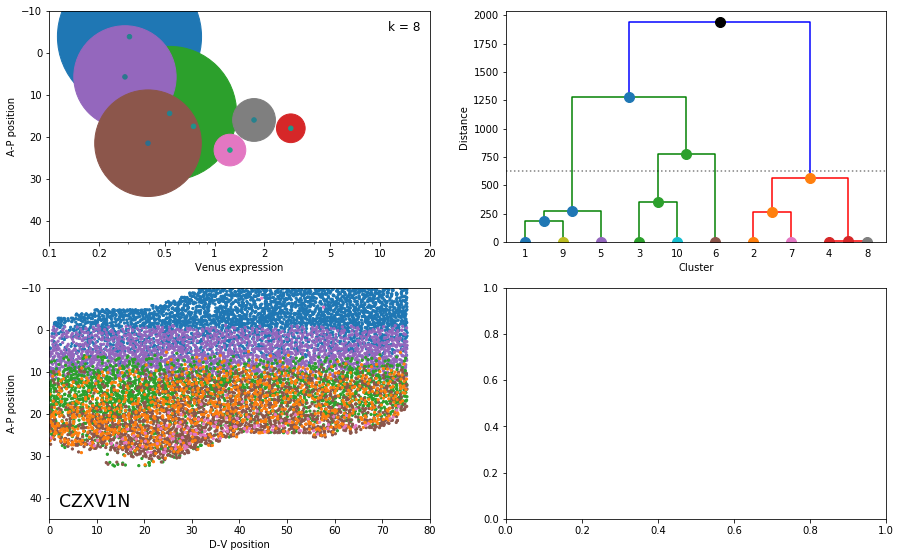

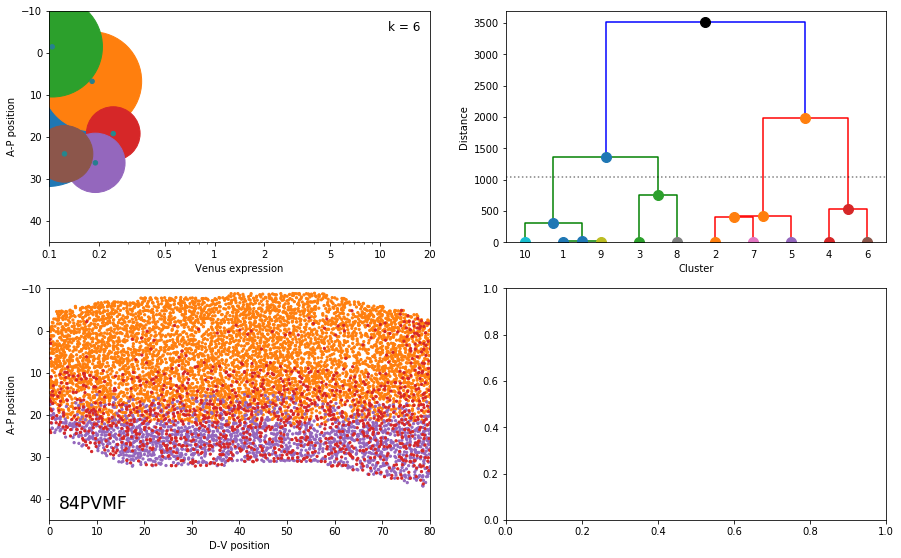

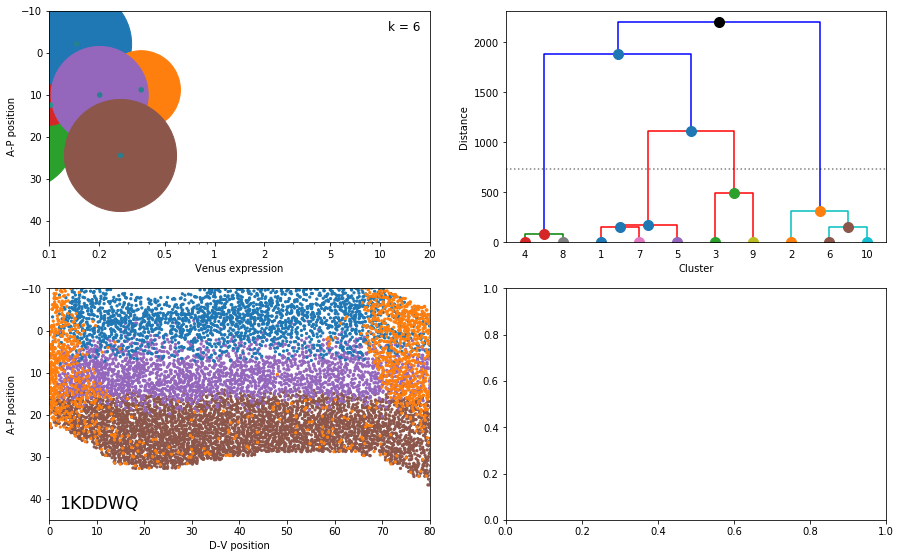

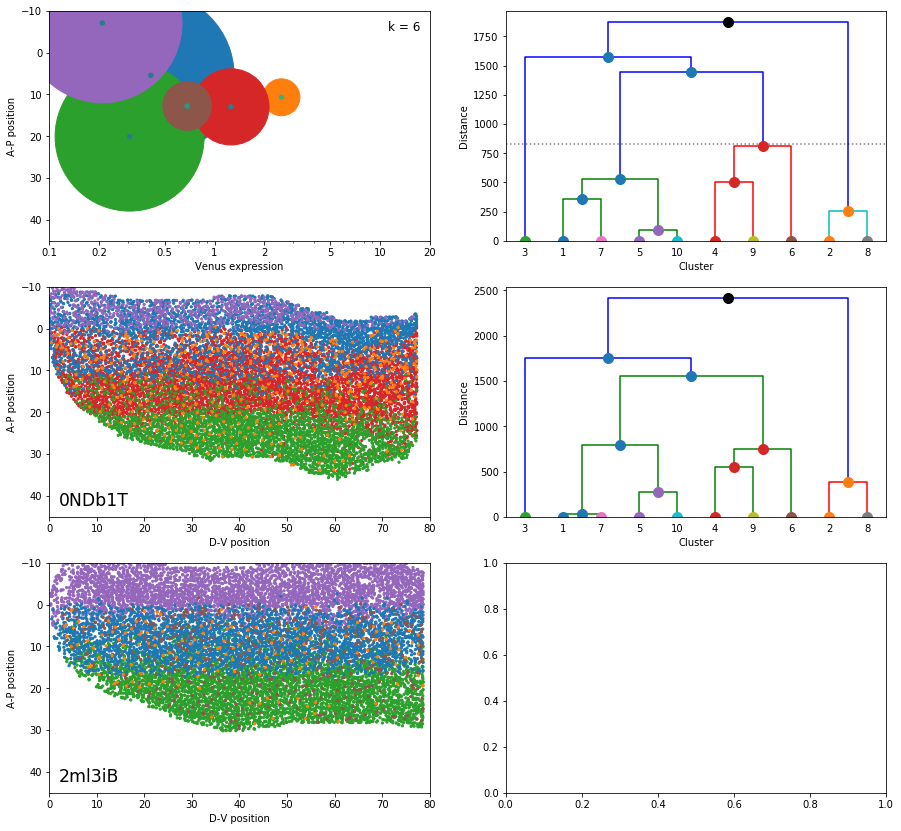

In [38]:
sample_dir = path.expanduser(
    '~/Google Drive File Stream/My Drive/Projects/RDN-WDP/new-clustering/single-gene')
files = os.listdir(sample_dir)
genes = []
for sample_f in files:
    if path.isfile(path.join(sample_dir, sample_f)) and sample_f.endswith('.csv'):
        g = sample_f.split('_')[2]
        if g not in genes:
            genes.append(g)

for gene in genes:
    print("Procesing", gene, '...')
    try:
        gene_summary(gene, sample_dir)
    except:
        print("Error processing ", gene, "!")